<a href="https://colab.research.google.com/github/nv-hiep/ML/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
from sklearn.datasets import  load_sample_image
from sklearn.cluster import KMeans

# Data

In [3]:
data = load_sample_image('flower.jpg')
data.shape

(427, 640, 3)

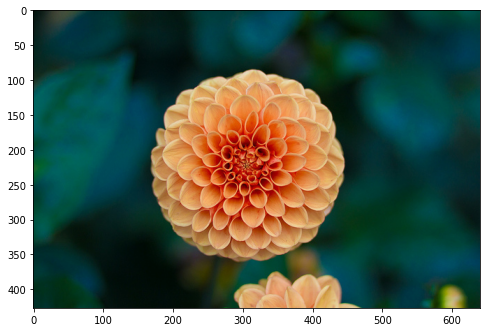

In [6]:
plt.figure(figsize=(8,8))
plt.imshow(data)
plt.show()

In [22]:
data_norm = np.array(data, dtype=np.float64) / 255.

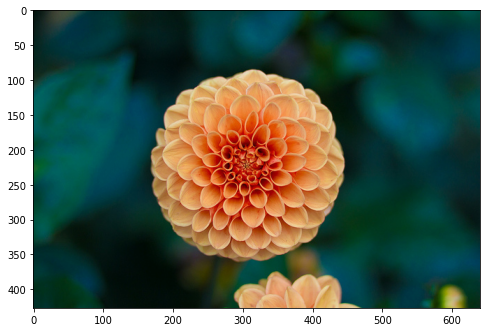

In [23]:
plt.figure(figsize=(8,8))
plt.imshow(data_norm)
plt.show()

In [32]:
w, h, c = original_shape = data_norm.shape
print(w, h, c)
data_array = np.reshape(data_norm, (w*h, c))
print(data_array.shape)

427 640 3
(273280, 3)


In [37]:
np.unique(data_array).shape

(256,)

In [38]:
n_samples = 10_000
data_samples = shuffle(data_array, random_state=33)[:n_samples]
data_samples.shape

(10000, 3)

In [41]:
# Training using Kmeans, n_clusters = 128
n_color_clusters = 128
kmeans = KMeans(n_clusters=n_color_clusters, random_state=33)
kmeans.fit(data_samples)
kmeans

KMeans(n_clusters=128, random_state=33)

In [42]:
print(kmeans.labels_.shape)
kmeans.labels_

(10000,)


array([80, 44, 58, ..., 57, 25, 46], dtype=int32)

In [43]:
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[:5])

(128, 3)
[[0.02588235 0.15005968 0.1345439 ]
 [0.83017207 0.52084834 0.27739096]
 [0.00255092 0.28884447 0.31147915]
 [0.75079064 0.28108792 0.02074636]
 [0.88399453 0.69895121 0.54829001]]


In [45]:
# Get color indices for full image
labels = kmeans.predict(data_array)
labels.shape

(273280,)

In [46]:
def reconstruct_img(cluster_centers, labels, w, h):
  nchannels = 3
  img = np.zeros((w, h, nchannels))
  label_id = 0
  for i in range(w):
    for j in range(h):
      img[i][j] = cluster_centers[labels[label_id]]
      label_id += 1
  return img

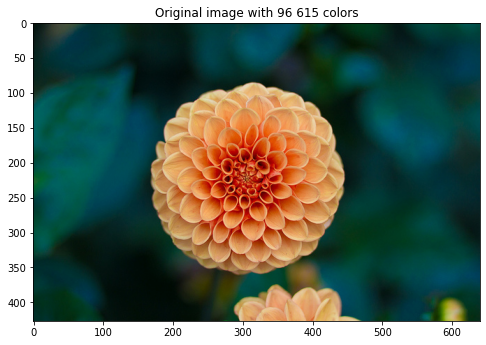

In [50]:
# Original image
plt.figure(figsize=(8,8))
plt.imshow(data_norm)
plt.title("Original image with 96 615 colors")
plt.show()

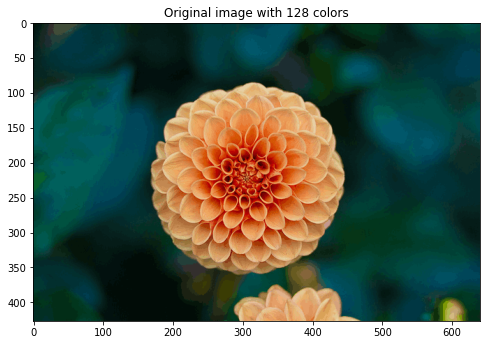

In [49]:
# Reconstructed image
reconstructed_img = reconstruct_img(kmeans.cluster_centers_, labels, w, h)

plt.figure(figsize=(8,8))
plt.imshow(reconstructed_img)
plt.title(f"Original image with {n_color_clusters} colors")
plt.show()

In [51]:
# Training using Kmeans, n_clusters = 128
n_color_clusters = 8
kmeans = KMeans(n_clusters=n_color_clusters, random_state=33)
kmeans.fit(data_samples)
kmeans

KMeans(random_state=33)

In [52]:
print(kmeans.labels_.shape)
kmeans.labels_

(10000,)


array([5, 7, 5, ..., 1, 0, 0], dtype=int32)

In [53]:
print(kmeans.cluster_centers_.shape)
print(kmeans.cluster_centers_[:5])

(8, 3)
[[0.00318426 0.30766554 0.32348815]
 [0.85365561 0.59548641 0.35600365]
 [0.01551142 0.21062308 0.19256612]
 [0.71349351 0.15061033 0.02285556]
 [0.27488661 0.26929035 0.1254902 ]]


In [54]:
# Get color indices for full image
labels = kmeans.predict(data_array)
labels.shape

(273280,)

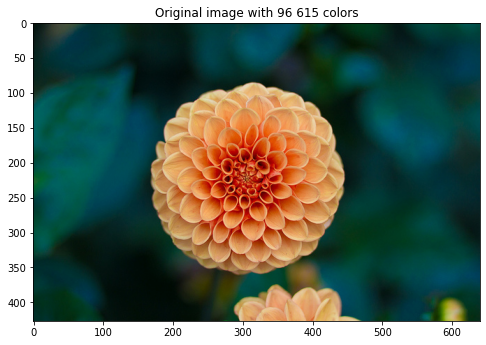

In [55]:
# Original image
plt.figure(figsize=(8,8))
plt.imshow(data_norm)
plt.title("Original image with 96 615 colors")
plt.show()

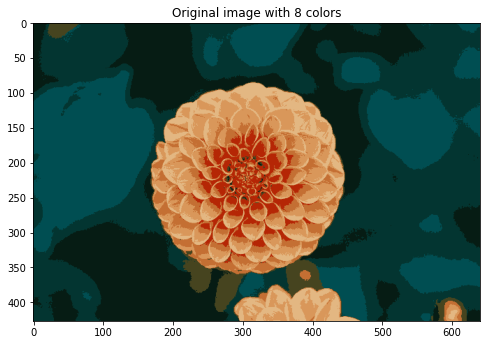

In [56]:
# Reconstructed image
reconstructed_img = reconstruct_img(kmeans.cluster_centers_, labels, w, h)

plt.figure(figsize=(8,8))
plt.imshow(reconstructed_img)
plt.title(f"Original image with {n_color_clusters} colors")
plt.show()

# Principal Component Analysis (PCA)

In [57]:
from sklearn.datasets import  load_iris
from sklearn.decomposition import PCA

In [59]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

label_names = iris.target_names
print(label_names.shape)
label_names

(150, 4)
(150,)
(3,)


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Number of features of X: 4

In [60]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

Number of principle components: 2

In [61]:
print("Explained variance ratio from PCA: {}".format(pca.explained_variance_ratio_))

Explained variance ratio from PCA: [0.92461872 0.05306648]


In [62]:
pca.explained_variance_

array([4.22824171, 0.24267075])

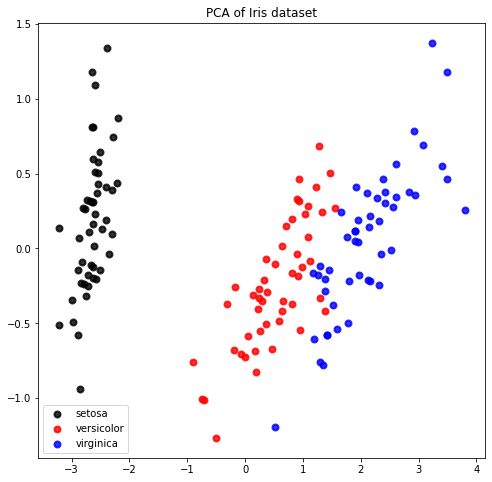

In [63]:
# Plot the PCA of Iris dataset
colors = ['k', 'r', 'b']
lw = 2

plt.figure(figsize=(8,8))

for color, i, label_name in zip( colors, [0, 1, 2], label_names ):
  plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=0.8, lw=lw, label=label_name )
plt.legend(loc="best", shadow=False, scatterpoints=1)  
plt.title("PCA of Iris dataset")
plt.show()